### Module 13: Multiple Linear Regression and Polynomial Regression

his notebook contains all coding parts for Module 13 using a real world dataset from scikit-learn.

We will work through the following sections:

Section 0: Setup and Data Loading
Section 1: Introduction to Multiple Linear Regression (Notebook part)
Section 3: Coding Multiple Linear Regression on Real Data
Section 4: Introduction to Polynomial Regression (Notebook part)
Section 6: Coding Polynomial Regression on Real Data
Sections 2 and 5 are math and concept heavy, so those will be handled in slides, not in this notebook.

### Section 0: Setup and Data Loading

In this section we:

Import all required libraries
Load the California Housing dataset from scikit-learn
Wrap it into a pandas DataFrame
Inspect the basic structure and summary statistics
The California Housing dataset is based on real census information, so it is a good example of a real world regression problem.

In [5]:
# Section 0: Setup - Import libraries

import numpy as np              # For numerical operations and arrays
import pandas as pd             # For working with tabular data
import matplotlib.pyplot as plt # For plotting graphs

from sklearn.datasets import fetch_california_housing   # Real world regression dataset
from sklearn.model_selection import train_test_split    # Train test split utility
from sklearn.linear_model import LinearRegression       # Multiple Linear Regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Evaluation metrics
from sklearn.preprocessing import PolynomialFeatures    # For generating polynomial features
from sklearn.pipeline import Pipeline                   # For chaining preprocessing and model

# Configure matplotlib for slightly nicer default plots
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['axes.grid'] = True

In [4]:
# Load the California Housing dataset

california = fetch_california_housing(as_frame=True)

# `california.frame` is a pandas DataFrame that already includes
# both the features and the target column

df = california.frame.copy()

print(df.shape)
df.head(10)

(20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


Feature Descriptions:

MedInc: Median income of households in the block (measured in tens of thousands of US dollars).

HouseAge: Median age of the houses in the block (in years).

AveRooms: Average number of rooms per household in the block.

AveBedrms: Average number of bedrooms per household in the block.

Population: Total number of people living in the block.

AveOccup: Average number of occupants per household in the block.

Latitude: Geographic latitude of the block; higher values indicate farther north.

Longitude: Geographic longitude of the block; higher values indicate farther west.

MedHouseVal: Median house value for households in the block (in US dollars).




In [6]:
# Basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [7]:
# Summary statistics for numeric columns

df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


### Section 1: Introduction to Multiple Linear Regression (Notebook part)

In multiple linear regression, we use several input features together to predict a single numeric target.

In this dataset:

    Target (y): MedHouseVal (median house value in a block)
    Candidate features (X): income, house age, average rooms, average bedrooms, population, average occupancy
In this section we will:

    Select a subset of features as our input matrix X
    Set MedHouseVal as the target y
    Inspect the shapes
    Look at simple correlations to build intuition about relationships

In [8]:
# Define target and feature columns
target_col = 'MedHouseVal'
feature_cols = ['MedInc','HouseAge', 'AveRooms','AveBedrms','Population','AveOccup']

x=df[feature_cols]
y = df[target_col]
x.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269


In [9]:
# Check shape of X and Y
print("Shape of X: ", x.shape)  #(number_of_rows, number_of_features)
print("Shape of Y: ", y.shape) #(number_of_rows)

Shape of X:  (20640, 6)
Shape of Y:  (20640,)


Correlation Matrix: 
               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             MedHouseVal  
MedInc          0.688075  
HouseAge        0.105623  
AveRooms        0.151948  
AveBedrms      -0.046701  
Population     -0.024650  
AveOccup       -0.023737  
MedHouseVal     1.000000  


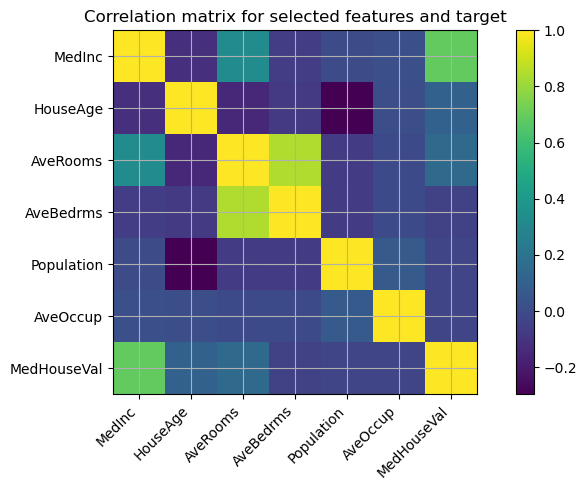

In [11]:
# Sinple correlation matrix between selected features and target_col
corr_matrix = df[feature_cols+[target_col]].corr()
print("Correlation Matrix: ")
print(corr_matrix)

# Plot correlation matrix using matplotlib
fig, ax = plt.subplots()
cax = ax.imshow(corr_matrix.values, interpolation='nearest')
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.index)))
ax.set_xticklabels(corr_matrix.columns, rotation=45, ha='right')
ax.set_yticklabels(corr_matrix.index)
fig.colorbar(cax)
ax.set_title('Correlation matrix for selected features and target')
plt.tight_layout()
plt.show()


### Section 3: Coding Multiple Linear Regression on Real Data

In this section we implement a full workflow for multiple linear regression:

    1. Split the data into training and test sets
    2. Fit a LinearRegression model on the training data
    3. Inspect the learned coefficients and intercept
    4. Make predictions on train and test sets
    5. Evaluate the model using MAE, RMSE, and R squared
    6. Visualize predicted vs actual values
    7. Plot residuals to check basic patterns
We will use the feature matrix X and target y defined in Section 1.

